# embeded 방식

In [1]:
import seaborn as sns

In [2]:
iris = sns.load_dataset('iris')

In [3]:
from sklearn.model_selection import cross_val_score

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
import mglearn

In [8]:
mglearn.plot_tree_nonmonotonous.plot_tree_not_monotone()

ModuleNotFoundError: No module named 'graphviz'

In [9]:
dt = DecisionTreeClassifier()

In [10]:
dt.fit(iris.iloc[:,:-1], iris.iloc[:,-1])
# 자동으로 문자열로 바꿔주는구나-! 

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

logistic regression one-hot안됨...

In [12]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [11]:
dt.feature_importances_
# 값이 클수록 영향력 크다.
# colummn2개만 쓸 때 3,4번째 column만 쓰면 되겠다.

# petal length가 영향력이 제일 크다.

array([0.01333333, 0.01333333, 0.55072262, 0.42261071])

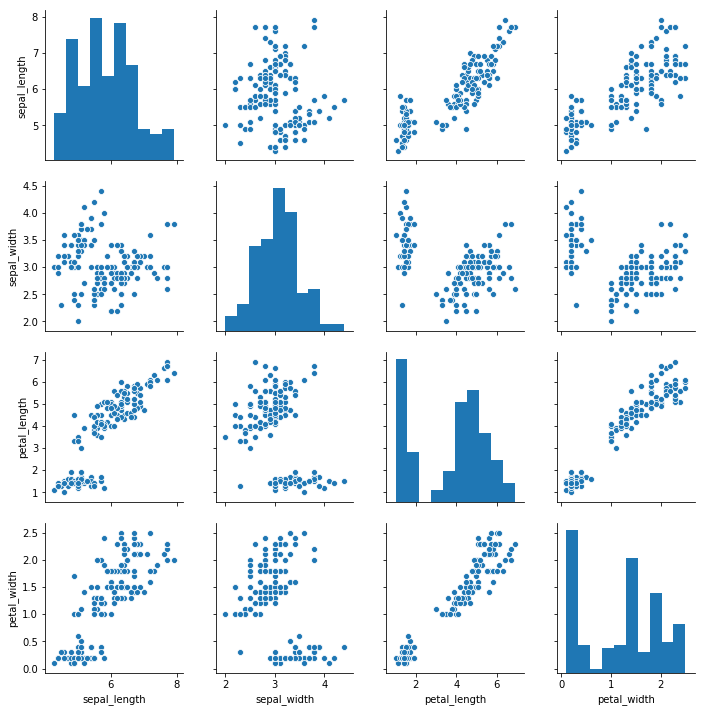

In [13]:
sns.pairplot(iris)

앙상블 패키지 특징 :  
모델 여러개 만들어서 경쟁시켜서 분류하는 패키지

1. 성능이 좋다.
2. overfitting이 잘 안일어남
3. 학습 예측시간이 오래걸림
4. 데이터를 많이 필요로함

In [14]:
from sklearn.ensemble import RandomForestClassifier  # decision tree많이 만듦어서 forest를 만듦 : 합쳐서 의사결정 == 앙상블

In [15]:
rfc = RandomForestClassifier()

In [17]:
rfc.fit(iris.iloc[:,:-1], iris.iloc[:,-1])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
rfc

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
stacking기법이 좋다. 근데 왜...???????
http://rasbt.github.io/mlxtend/ == 케글 상위권자가 많이 씀

Ensemble(여러 알고리즘 스까씀)

In [19]:
from sklearn.ensemble import VotingClassifier

In [20]:
from sklearn.neighbors import KNeighborsClassifier

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

In [24]:
vc = VotingClassifier([knn, dt])

In [25]:
vc.fit(iris.iloc[:,:-1], iris.iloc[:,-1])

TypeError: zip argument #1 must support iteration

In [26]:
!pip3 install mlxtend

     |████████████████████████████████| 1.3MB 848kB/s eta 0:00:01


In [27]:
from mlxtend.classifier import EnsembleVoteClassifier
# user guide와 directory모양이 같다

In [28]:
ev = EnsembleVoteClassifier([knn, dt])
# 약점 보완 가능...! 무슨뜻인지 찾아보자...!
# 내 생각엔 서로 보완하는 기능을 하는듯

In [29]:
ev.fit(iris.iloc[:,:-1], iris.iloc[:,-1])

EnsembleVoteClassifier(clfs=[KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                             DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_le

In [ ]:
# 같은 코드인데 오류나는 이유 VotingClassifier, EnsembleVoteClassifier같은 기능임..!
# scikit은 pandas에 종속될까봐 numpy만 지원
# pandas에 잘 안맞음
# mlxtend는 pandas잘 됨 == 그렇게 만들었으니까..!